### EDA Dataset HF MMS nlp

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from nltk.corpus import stopwords
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from wordcloud import WordCloud

from datasets import load_dataset, concatenate_datasets, ClassLabel, Features, Value
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [2]:
# download italian stop words
nltk.download('stopwords')

italian_stop_words = set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lsaetta/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# contains email and sentiment to add to the training dataset
# hand labelled
DATASET_NAME = "Brand24/mms"

# load Brand24/mms dataset
dataset = load_dataset(DATASET_NAME)["train"]

Extracting data files:   0%|          | 0/80 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
# for my custom dataset
def remove_non_breaking_space(example):
    # Assuming the text is under the key 'text'
    example['text'] = example['text'].replace('\xa0', ' ')
    return example

#### as Pandas Dataframe

In [10]:
dataset.set_format(type="pandas")

df = dataset[:]

# filtra solo il linguaggio italiano
df = df[df["language"] == 'it']

df.head()

,_id,text,label,original_dataset,domain,language,Family,Genus,Definite articles,Indefinite articles,Number of cases,"Order of subject, object, verb",Negative morphemes,Polar questions,Position of negative word wrt SOV,Prefixing vs suffixing,Coding of nominal plurality,Grammatical genders,cleanlab_self_confidence
4676330,4676330,#Napolitano nomina Mario Monti senatore a vit...,1,it_evalita2016,social_media,it,Indo-European,Romance,definite word distinct from demonstrative,indefinite word same as one,no morphological case-making,SVO,negative particle,interrogative intonation only,SNegVO,strongly suffixing,plural suffix,"masculine, feminine",0.519660
4676331,4676331,#Postofisso che #monotonia : Twitter attacca ...,0,it_evalita2016,social_media,it,Indo-European,Romance,definite word distinct from demonstrative,indefinite word same as one,no morphological case-making,SVO,negative particle,interrogative intonation only,SNegVO,strongly suffixing,plural suffix,"masculine, feminine",0.467238
4676332,4676332,@BocioDeBocis: i ministri del governo #monti ...,1,it_evalita2016,social_media,it,Indo-European,Romance,definite word distinct from demonstrative,indefinite word same as one,no morphological case-making,SVO,negative particle,interrogative intonation only,SNegVO,strongly suffixing,plural suffix,"masculine, feminine",0.250455
4676333,4676333,@Daniele_Manca:Non sarà facile per i ministri...,0,it_evalita2016,social_media,it,Indo-European,Romance,definite word distinct from demonstrative,indefinite word same as one,no morphological case-making,SVO,negative particle,interrogative intonation only,SNegVO,strongly suffixing,plural suffix,"masculine, feminine",0.624930
4676334,4676334,"@LiaCeli: Tripoli, Mario Monti incontra il pr...",0,it_evalita2016,social_media,it,Indo-European,Romance,definite word distinct from demonstrative,indefinite word same as one,no morphological case-making,SVO,negative particle,interrogative intonation only,SNegVO,strongly suffixing,plural suffix,"masculine, feminine",0.158252


In [12]:
df['original_dataset'].unique()

array(['it_evalita2016', 'it_multiemotions'], dtype=object)

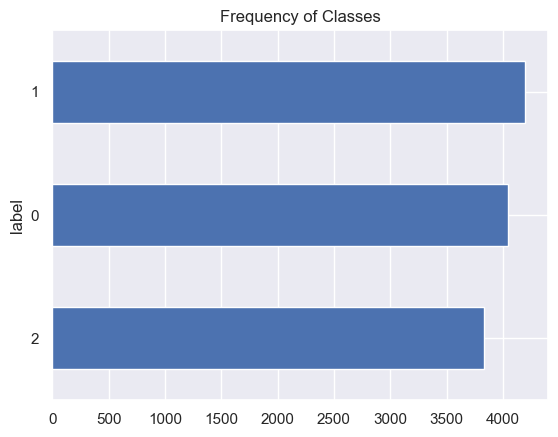

In [11]:
df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

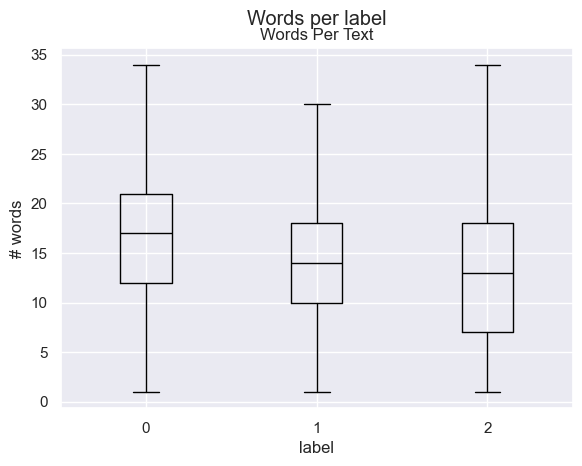

In [13]:
df["Words Per Text"] = df["text"].str.split().apply(len)

df.boxplot("Words Per Text", by="label", grid=True, showfliers=False,
           color="black")
plt.suptitle("Words per label")
plt.xlabel("label")
plt.ylabel("# words")
plt.show()

In [14]:
# prepare for Word Cloud
texts = list(df['text'].values)

# Join all texts into a single string
all_text = ' '.join(texts)

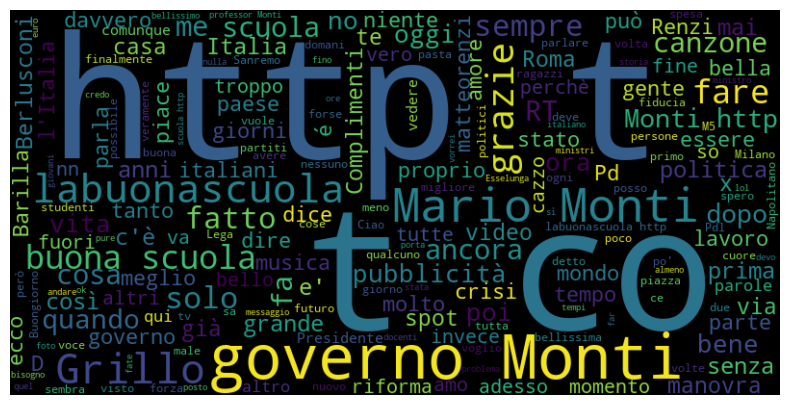

In [15]:
# Generate a word cloud image, removed Italian Stop words
wordcloud = WordCloud(stopwords=italian_stop_words, width=800, height=400).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### some simple stats

In [16]:
# make everything lowercase
all_text = ' '.join(texts).lower()

# Tokenize and remove non-alphabetic characters
words = re.findall(r'\b[a-z]+\b', all_text)

words = [word for word in words if word not in italian_stop_words]

# Count the frequency of each word
word_counts = Counter(words)

In [17]:
# Get the most common words
most_common_words = word_counts.most_common(10)  # Adjust the number as needed

In [18]:
word_freq = word_counts.items()

# Create a DataFrame
df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

df = df.sort_values(by='Frequency', ascending=False)

In [19]:
df.head(20)

,Word,Frequency
3,monti,3202
13,t,3196
14,co,3171
12,http,3091
24,governo,2198
2,mario,1062
414,scuola,1006
421,labuonascuola,986
682,grillo,954
166,grazie,695
